# DS 2001: Group Project (Breast Cancer)
## Amelia Norman (aln4t), Jessica Laudie (jl5pd), Salem Kelata (stk4mqg)

In [18]:
# read in data

import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv(r'/Users/amelianorman/Desktop/ds2001-project/clinical_breast_cleaned.csv')
print(df.head())

   Gender  Age.at.Initial.Pathologic.Diagnosis ER.Status  PR.Status  \
0  FEMALE                                   66  Negative          0   
1  FEMALE                                   40  Negative          0   
2  FEMALE                                   48  Negative          0   
3  FEMALE                                   56  Negative          0   
4  FEMALE                                   38  Negative          0   

  HER2.Final.Status Tumor Node.Coded Metastasis Metastasis.Coded  AJCC.Stage  \
0          Negative    T3   Positive         M1         Positive    Stage IV   
1          Negative    T2   Negative         M0         Negative   Stage IIA   
2          Negative    T2   Positive         M0         Negative   Stage IIB   
3          Negative    T2   Positive         M0         Negative   Stage IIB   
4          Negative    T3   Positive         M0         Negative  Stage IIIC   

  Converted.Stage Survival.Data.Form Vital.Status  \
0   No_Conversion           followup   

# Data Cleaning

In [19]:
# rename columns and remove rows with male participants 

cleaned = df[["Gender", "Age.at.Initial.Pathologic.Diagnosis", "AJCC.Stage"]]
cleaned = cleaned.rename(columns={"Age.at.Initial.Pathologic.Diagnosis": "initial_age", "AJCC.Stage": "AJCC_stage"})

cleaned = cleaned.drop(cleaned[cleaned.Gender == "MALE"].index)
        
print(cleaned.head())

   Gender  initial_age  AJCC_stage
0  FEMALE           66    Stage IV
1  FEMALE           40   Stage IIA
2  FEMALE           48   Stage IIB
3  FEMALE           56   Stage IIB
4  FEMALE           38  Stage IIIC


In [20]:
# fixing indexing on graph; y-axis is showing values in the incorrect order

order = ["Stage I", "Stage IA", "Stage IB", "Stage II", "Stage IIA", "Stage IIB", "Stage III", "Stage IIIA", "Stage IIIB", "Stage IIIC", "Stage IV"]
order2 = ["I", "IA", "IB", "II", "IIA", "IIB", "III", "IIIA", "IIIB", "IIIC", "IV"]

cleaned['AJCC_stage'] = [order.index(x) for x in cleaned['AJCC_stage']]

df_sorted = cleaned.sort_values(["AJCC_stage"], ascending=True)
df_sorted['AJCC_stage'] = [order2[x] for x in df_sorted['AJCC_stage']]


# Visualizations

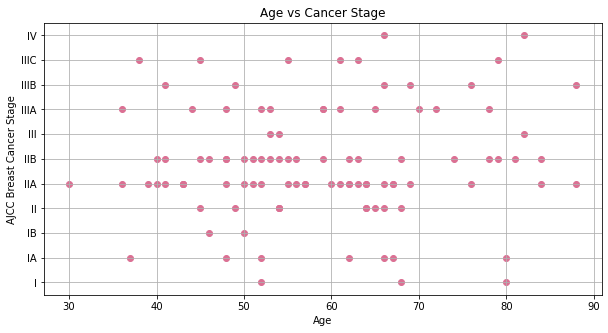

In [21]:
plt.figure(figsize = (10,5))

plt.scatter(df_sorted['initial_age'], df_sorted['AJCC_stage'], c='palevioletred')
plt.title('Age vs Cancer Stage')
plt.xlabel('Age') 
plt.ylabel('AJCC Breast Cancer Stage') 
plt.grid()

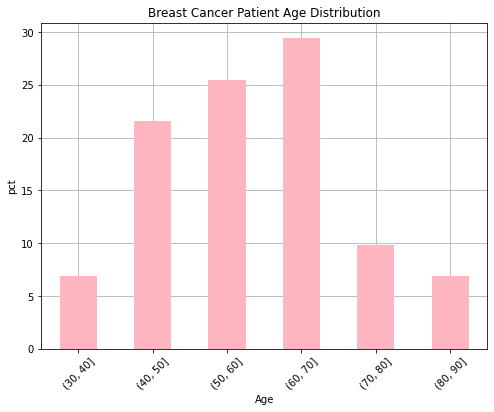

In [22]:
import numpy as np

#print(df_sorted['initial_age'].min()) # it's 30
#print(df_sorted['initial_age'].max()) # it's 88

#age_groups = ["30-39", "40-49", "50-59", "60-69", "70-79", "80-89"]

out = pd.cut(df_sorted['initial_age'], bins=[30, 40, 50, 60, 70, 80, 90])
out_norm = out.value_counts(sort=False, normalize=True).mul(100)
ax = out_norm.plot.bar(rot=45, color="lightpink", figsize=(8,6), zorder=3)
ax.grid(zorder=0)
# ax.set_xticklabels([c[1:-1].replace(","," to") for c in out.cat.categories])
plt.title('Breast Cancer Patient Age Distribution')
plt.xlabel('Age') 
plt.ylabel('pct')
plt.show()

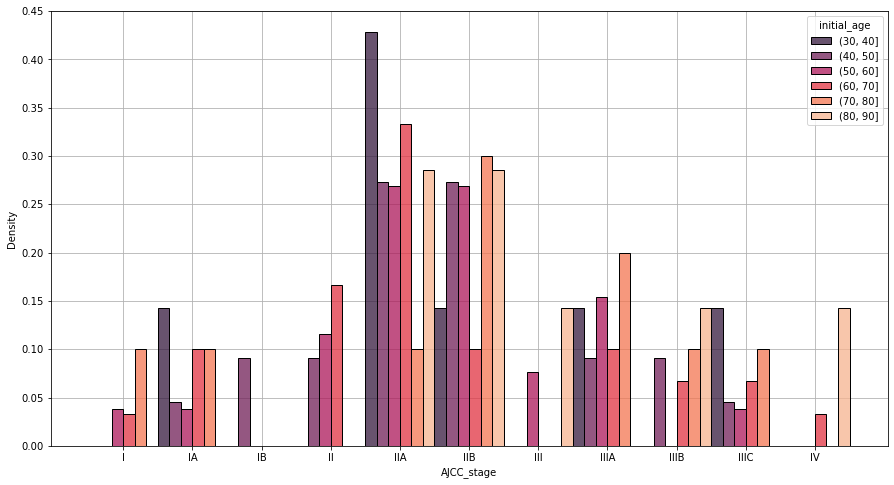

In [23]:
import seaborn as sns
new_bins = pd.cut(df_sorted['initial_age'], bins=[30, 40, 50, 60, 70, 80, 90])

plt.figure(figsize = (15,8))
# hist = sns.countplot(x="AJCC_stage", hue=new_bins, data=df_sorted, palette="rocket")

hist = sns.histplot(df_sorted, x="AJCC_stage", hue=new_bins, multiple="dodge", stat="density", common_norm=False, palette="rocket", zorder=3)
hist.grid(zorder=0)


In [24]:
# run statistical tests
# first, check age variances 

# split age groups 30-60 and 60-90
group1 = df_sorted[df_sorted['initial_age'] < 60]
group2 = df_sorted[df_sorted['initial_age'] >= 60]


import pandas as pd
from os import getcwd, path
import plotly.express as px
import plotly.offline as pyo

# I (Amelia) have used plotly before, but grabbed code from the following: https://medium.com/nerd-for-tech/analyse-the-distribution-of-ages-python-data-analysis-series-part-1-cc0fb2ca7f36
# for better data visualization; it was difficult to format everything correctly using matplotlib and seaborn

# To see correctly on your machine, install the plotly package

group1_counts = group1["initial_age"].value_counts()

fig = px.bar(group1_counts, title="Age Group 1")
fig.update_layout(
    xaxis_title = "Age",
    yaxis_title = "Frequency",
    title_x = 0.5,
    showlegend = False
)

fig.show()

In [25]:
group2_counts = group2["initial_age"].value_counts()

fig2 = px.bar(group2_counts, title="Age Group 2")
fig2.update_layout(
    xaxis_title = "Age",
    yaxis_title = "Frequency",
    title_x = 0.5,
    showlegend = False
)

fig2.show()

# Statistical Analysis

In [26]:
# as seen above, distributions are uneven. For the t-tests, we will analyze them as having unequal variances.
import scipy.stats as stats

# null hypothesis: mu1 = mu2
# alternate hypothesis: mu != mu2
# this will test whether there is a difference in the diagnoses of differing age groups

# In order to demonstrate this more clearly, I will convert the stage values to integer values. 
# A skew one way or the other will demonstrate about which stage is the average for each group.

current_order = ["I", "IA", "IB", "II", "IIA", "IIB", "III", "IIIA", "IIIB", "IIIC", "IV"]
#new_order = [1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 4]

df_sorted['AJCC_stage'] = [current_order.index(x) for x in df_sorted['AJCC_stage']]

#df_sorted['AJCC_stage'] = [new_order[x] for x in df_sorted['AJCC_stage']]

print(df_sorted.head())

    Gender  initial_age  AJCC_stage
71  FEMALE           68           0
18  FEMALE           52           0
65  FEMALE           80           0
76  FEMALE           52           1
50  FEMALE           67           1


<AxesSubplot:xlabel='group', ylabel='AJCC_stage'>

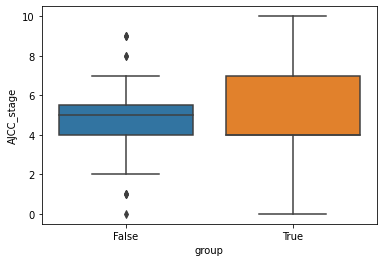

In [27]:
df_sorted['group'] = df_sorted.initial_age.apply(lambda x: x >= 60)

sns.boxplot(x='group', y='AJCC_stage', data=df_sorted)

In [28]:
df_sorted[df_sorted['group'] == True].mean()

initial_age    70.208333
AJCC_stage      4.895833
group           1.000000
dtype: float64

In [29]:
df_sorted[df_sorted['group'] == False].mean()

initial_age    48.472727
AJCC_stage      4.727273
group           0.000000
dtype: float64

In [30]:
# try chi-squared testing

import numpy as np
from scipy.stats import chi2_contingency 

chi2_test = df_sorted[['initial_age', 'AJCC_stage']].to_numpy()
chi_val, p_val, dof, expected = chi2_contingency(chi2_test)

print("chi value:", chi_val, "|| p value:", p_val, "|| degrees of freedom:", dof)

# p value is still greater than significance level 0.05

chi value: 118.04191292066444 || p value: 0.13236808056401783 || degrees of freedom: 102


In [31]:
# re-categorize groups
group1 = df_sorted[df_sorted['initial_age'] < 60]
group2 = df_sorted[df_sorted['initial_age'] >= 60]

tstat, pval = stats.ttest_ind(group1['AJCC_stage'], group2['AJCC_stage'], equal_var=False, alternative='two-sided')
print("t-statistic:", round(tstat,4), "p-value:", round(pval,4))

# The p-value is greater than the default significance level 0.05, so we do not have enough evidence to reject 
# the null hypothesis.

t-statistic: -0.3698 p-value: 0.7124


In [32]:
# re-categorize groups 
group3 = df_sorted[df_sorted['initial_age'] < 50]
group4 = df_sorted[df_sorted['initial_age'] >= 70]

tstat2, pval2 = stats.ttest_ind(group3['AJCC_stage'], group4['AJCC_stage'], equal_var=False, alternative='two-sided')
print("t-statistic:", round(tstat2,4), "p-value:", round(pval2,4))

# The p-value is lower than in the previous test; check standard deviation of ages

t-statistic: -0.9657 p-value: 0.3414


In [33]:
df_sorted.describe()

# based off this, we note that the average cancer stage is IIB and the average age is 58 years old. The dataset is 
# clearly skewed towards a later age. The standard age deviation is 13 years. In the next t-test, test past 1 std

,initial_age,AJCC_stage
count,103.000000,103.000000
mean,58.601942,4.805825
std,13.161396,2.262474
min,30.000000,0.000000
25%,49.000000,4.000000
50%,57.000000,4.000000
75%,66.500000,6.500000
max,88.000000,10.000000


In [34]:
# re-categorize groups 
group5 = df_sorted[df_sorted['initial_age'] < 45.6]
group6 = df_sorted[df_sorted['initial_age'] >= 71.6]

tstat3, pval3 = stats.ttest_ind(group5['AJCC_stage'], group6['AJCC_stage'], equal_var=False, alternative='two-sided')
print("t-statistic:", round(tstat3,4), "p-value:", round(pval3,4))

# Here, there is likely not enough data and it may demonstrate the issue in the dataset where people are far more likely
# to be diagnosed with Type II cancer regardless of age, but particularly at the ages being analyzed in the test

t-statistic: -0.515 p-value: 0.6102


# Unit Testing

In [ ]:
#UNIT Testing 1
from unittest import TestCase
import pandas as pd

df = pd.read_csv('/Users/salemkeleta/Downloads/clinical_breast_cleaned.csv')
df1 = df.iloc[:3]
order = ["Stage I", "Stage IA", "Stage IB", "Stage II", "Stage IIA", "Stage IIB", "Stage III", "Stage IIIA", "Stage IIIB", "Stage IIIC", "Stage IV"]
actual1 = [order.index(x) for x in df1['AJCC.Stage']]==[10,4,5]
expected = True
tc = TestCase()

print(tc.assertEqual(actual1,expected))


#UNIT Testing 2
from unittest import TestCase
import pandas as pd

df = pd.read_csv('/Users/salemkeleta/Downloads/clinical_breast_cleaned.csv')
cleaned_df = df.rename(columns={"Age.at.Initial.Pathologic.Diagnosis": "initial_age"})

actual2 = cleaned_df.initial_age.apply(lambda x: x <= 30).all()
expected2 = False
tc2 = TestCase()

print(tc2.assertEqual(actual2,expected2))

